In [1]:
from pandas_datareader import data as pdr
#import yfinance as yf
#yf.pdr_override()

#Tech Company
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
amzn = pdr.get_data_yahoo('AMZN', start='2018-05-04')
#Electric Vehicles
tsla = pdr.get_data_yahoo('TSLA', start='2018-05-04')
nio = pdr.get_data_yahoo('NIO', start='2018-05-04')
#Smart Phone
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
apple = pdr.get_data_yahoo('AAPL', start='2018-05-04')

In [28]:
sec.head()
#tsla.tail(10)
#amzn.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-04,53900.0,51800.0,53000.0,51900.0,39565391.0,50660.105469
2018-05-08,53200.0,51900.0,52600.0,52600.0,23104720.0,51343.382812
2018-05-09,52800.0,50900.0,52600.0,50900.0,16128305.0,49683.992188
2018-05-10,51700.0,50600.0,51700.0,51600.0,13905263.0,50367.269531
2018-05-11,52200.0,51200.0,52000.0,51300.0,10314997.0,50074.437500


In [17]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,High,Low,Open,Close,Adj Close
Date,,,,,
2020-12-24,223.610001,221.199997,221.419998,222.750000,222.750000
2020-12-28,226.029999,223.020004,224.449997,224.960007,224.960007
2020-12-29,227.179993,223.580002,226.309998,224.149994,224.149994
2020-12-30,225.630005,221.470001,225.229996,221.679993,221.679993
2020-12-31,223.000000,219.679993,221.699997,222.419998,222.419998


In [19]:
sec.index
sec.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [20]:
import matplotlib.pyplot as plt

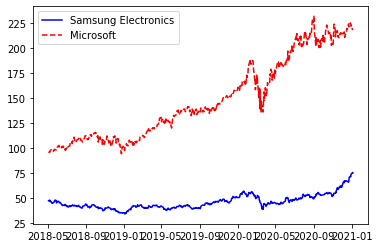

In [53]:
sec_USD = sec.Close /1100
sec_USD
plt.plot(sec.index, sec_USD, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

In [54]:
sec['Close'].shift(1)
sec_dpc = (sec['Close'] / sec['Close'].shift(1) -1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [55]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

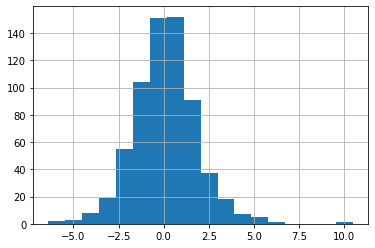

In [56]:
import matplotlib.pyplot as plt
#sec_dpc = (sec['Close'] - sec['Close'].shift(1)) /sec['Close'].shift(1) * 100
#sec_dpc.iloc[0] = 0
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [57]:
sec_dpc.describe()

count    654.000000
mean       0.086630
std        1.758028
min       -6.387665
25%       -0.991300
50%        0.106496
75%        1.059138
max       10.470588
Name: Close, dtype: float64

In [58]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2020-12-28    51.608284
2020-12-29    51.100024
2020-12-30    54.548300
2021-01-04    57.017436
2021-01-05    56.655990
Name: Close, Length: 654, dtype: float64

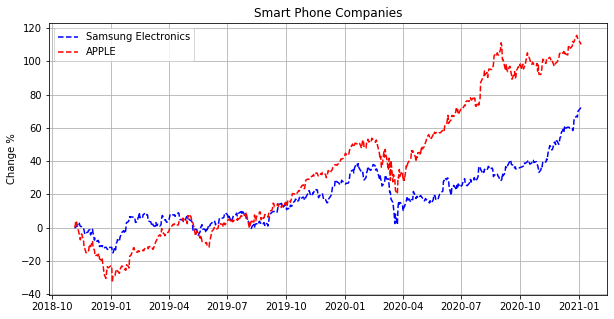

In [105]:
plt.rcParams['figure.figsize'] = [10, 5] #plt size
sec = pdr.get_data_yahoo('005930.KS', start='2018-11-04')
sec_dpc = (sec['Close'] - sec['Close'].shift(1)) /sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0 #First Column convert NaN to 0 
sec_dpc_cs = sec_dpc.cumsum() #Cumulative Sum

apple = pdr.get_data_yahoo('AAPL', start='2018-11-04')
apple_dpc = (apple['Close'] / apple['Close'].shift(1) -1) * 100
apple_dpc.iloc[0] = 0 #First Column convert NaN to 0 
apple_dpc_cs = apple_dpc.cumsum() # Cumulative Sum

plt.title("Smart Phone Companies")
plt.plot(sec.index, sec_dpc_cs, 'b--', label='Samsung Electronics')
plt.plot(apple.index, apple_dpc_cs, 'r--', label='APPLE')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

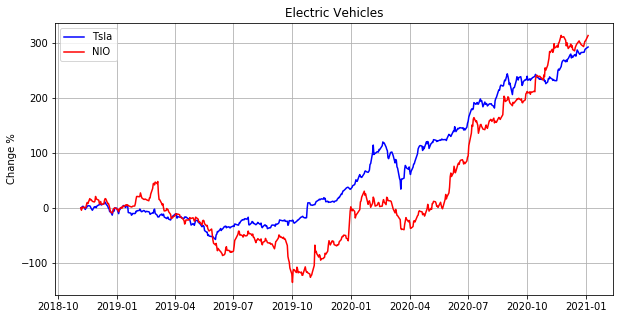

In [106]:
tsla = pdr.get_data_yahoo('TSLA', start='2018-11-04')
tsla_dpc = (tsla['Close'] / tsla['Close'].shift(1) -1)* 100
tsla_dpc.iloc[0] = 0
tsla_dpc_cs = tsla_dpc.cumsum()

nio = pdr.get_data_yahoo('NIO', start='2018-11-04')
nio_dpc = (nio['Close'] / nio['Close'].shift(1) -1) * 100
nio_dpc.iloc[0] = 0
nio_dpc_cs = nio_dpc.cumsum()

plt.title("Electric Vehicles")
plt.plot(tsla.index, tsla_dpc_cs, 'b', label='Tsla')
plt.plot(nio.index, nio_dpc_cs, 'r', label='NIO')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

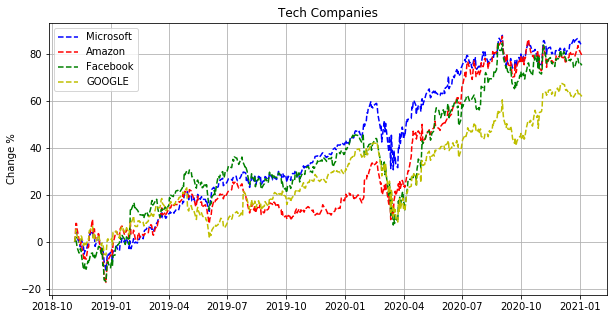

In [114]:
msft = pdr.get_data_yahoo('MSFT', start='2018-11-04')
msft_dpc = (msft['Close'] / msft['Close'].shift(1) -1)* 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

amzn = pdr.get_data_yahoo('AMZN', start='2018-11-04')
amzn_dpc = (amzn['Close'] / amzn['Close'].shift(1) -1) * 100
amzn_dpc.iloc[0] = 0
amzn_dpc_cs = amzn_dpc.cumsum()

fb = pdr.get_data_yahoo('FB', start='2018-11-04')
fb_dpc = (fb['Close'] / fb['Close'].shift(1) -1) * 100
fb_dpc.iloc[0] = 0
fb_dpc_cs = fb_dpc.cumsum()

gg = pdr.get_data_yahoo('GOOG', start='2018-11-04')
gg_dpc = (gg['Close'] / gg['Close'].shift(1) -1) * 100
gg_dpc.iloc[0] = 0
gg_dpc_cs = gg_dpc.cumsum()

plt.title("Tech Companies")
plt.plot(msft.index, msft_dpc_cs, 'b--', label='Microsoft')
plt.plot(amzn.index, amzn_dpc_cs, 'r--', label='Amazon')
plt.plot(fb.index, fb_dpc_cs, 'g--', label='Facebook')
plt.plot(gg.index, gg_dpc_cs, 'y--', label='GOOGLE')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()